Задача 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy Полученные значения должны быть равны. Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas.

In [17]:
import numpy as np
import pandas as pd
from statsmodels.stats.weightstats import _tconfint_generic as t_stat
import matplotlib.pyplot as plt

In [3]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

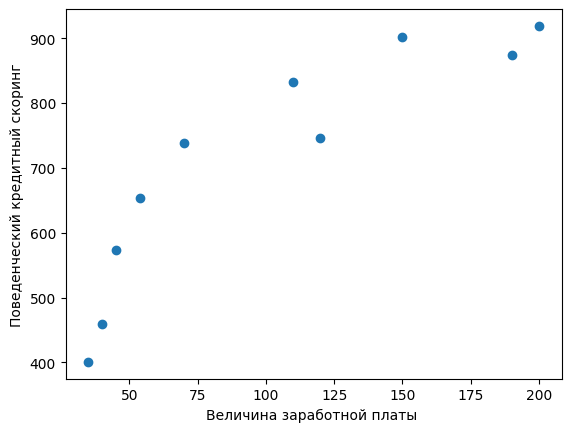

In [5]:
plt.scatter(zp,ks)
plt.xlabel('Величина заработной платы ')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

Из графика видна линейная зависимость данных, положительная корреляция.

Вычислим ковариацию:

In [6]:
cov_zp_ks = np.mean(zp*ks) - np.mean(zp)*np.mean(ks)
cov_zp_ks 

9157.839999999997

Проверим через встроенную функцию:

In [7]:
cov_zp_ks = np.cov(zp, ks, ddof=0)[0, 1]
cov_zp_ks

9157.84

Данные совпадают.

Найдем коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков:

In [8]:
corr = cov_zp_ks / (np.std(zp) * np.std(ks))
corr

0.8874900920739162

In [9]:
corr_coef = cov_zp_ks / (np.std(zp, ddof=0) * np.std(ks, ddof=0))
corr_coef

0.8874900920739162

pandas:

In [10]:
corr_pandas = pd.Series(zp).corr(pd.Series(ks), method='pearson')
corr_pandas

0.8874900920739162

numpy:

In [11]:
corr_numpy = np.corrcoef(zp, ks)[0][1]
corr_numpy

0.8874900920739162

Задача 2. Измерены значения IQ выборки студентов, обучающихся в местных технических вузах: 131, 125, 115, 122, 131, 115, 107, 99, 125, 111. Известно, что в генеральной совокупности IQ распределен нормально. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [15]:
X = np.array([131.0, 125.0, 115.0, 122.0, 131.0, 115.0, 107.0, 99.0, 125.0, 111.0])
mean_X = X.mean()
std_X = X.std(ddof=1)
mean_std_X = std_X / (np.sqrt(len(X)))

In [18]:
t_stat(mean_X, mean_std_X,len(X) - 1, 0.05, 'two-sided')

(110.55608365158724, 125.64391634841274)

Задача 3. Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27, среднее выборочное составляет 174.2. Найдите доверительный интервал для математического ожидания с надежностью 0.95.